In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
import numpy as np
import seaborn as sns

In [6]:
base_path = 'data'
mindreader = f'../data_loading/mindreader/ratings.csv'

ratings = pd.read_csv(mindreader)

ratings = ratings[ratings.uri.str.startswith('Decade-') != True]
#ratings = ratings[ratings.sentiment != 0]
print(len(ratings))
print(len(ratings[ratings.isItem == True][['userId', 'uri']]))
print(len(ratings[ratings.isItem == False][['userId', 'uri']]))

FileNotFoundError: [Errno 2] File b'../data_loading/mindreader/ratings.csv' does not exist: b'../data_loading/mindreader/ratings.csv'

In [ ]:
ratings = pd.read_csv(mindreader)

ratings = ratings[ratings.sentiment != 0]
fig, axes = plt.subplots(nrows=1)
dftmp = ratings[['userId', 'uri']].groupby('uri')['uri'].agg(uri_count='count')
dftmp = dftmp[dftmp.values > 2]

dftmp_m = ratings[ratings.isItem == True][['userId', 'uri']].groupby('uri')['uri'].agg(uri_count='count')
dftmp_e = ratings[ratings.isItem == False][['userId', 'uri']].groupby('uri')['uri'].agg(uri_count='count')
# dftmp_m = dftmp_m[dftmp_m.values > 2]
# dftmp_e = dftmp_e[dftmp_e.values > 2]


#dftmp.sort_values('uri_count', ascending=False).uri_count.plot.hist(bins=667, ax=axes[0])
dftmp_m.sort_values('uri_count').uri_count.plot.line(ax=axes)
dftmp_e.sort_values('uri_count').uri_count.plot.line(ax=axes)

axes.set_xlabel('Ordered entity index')
axes.set_ylabel('Number of ratings')

axes.grid(True, 'major', 'both')

axes.xaxis.set_major_locator(MultipleLocator(400))
axes.xaxis.set_major_formatter(FormatStrFormatter('%d'))
axes.xaxis.set_minor_locator(MultipleLocator(200))

axes.yaxis.set_major_locator(MultipleLocator(50))
axes.yaxis.set_major_formatter(FormatStrFormatter('%d'))
axes.yaxis.set_minor_locator(MultipleLocator(25))

handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, ['Items', 'Descriptive entites'])

plt.title('All entities and their ratings ordered')

plt.savefig('num_ratings.pdf')
plt.show()

del fig, axes, dftmp, dftmp_e, dftmp_m

In [ ]:
ratings2 = ratings[ratings.sentiment != 0]

dftmp = ratings2[['userId', 'uri']].groupby('userId')['userId'].agg(uri_count='count')
dftmp1 = dftmp[dftmp.values >= 15]
dftmp2 = dftmp[dftmp.values >= 16]
dftmp3 = dftmp[dftmp.values < 15]

dftmp1.transpose().count().plot.hist()
dftmp2.transpose().count().transpose().plot.hist()
dftmp3.transpose().count().transpose().plot.hist()

plt.show()
del dftmp, dftmp1, dftmp2, dftmp3, ratings2

         m_count
movieId         
318          274
356          249
296          244
593          225
2571         222
260          201
2959         179
527          175
1196         168
110          166
1198         163
50           163
858          158
2858         152
1210         150
589          150
1            147
4993         146
480          145
2028         141
47           140
7153         140
608          137
457          137
5952         131
150          127
2762         125
4226         122
1270         121
32           118
3578         117
364          115
4306         114
588          113
58559        112
1214         110
1197         109
1193         108
79132        107
1221         107
1089         106
1291         105
7361         105
2329         104
1704         103
590          103
1213         103
1136         101
1036          99
1265          97


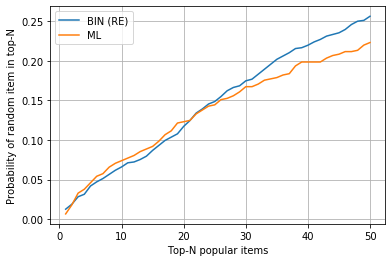

In [27]:
import pandas as pd
ratings = pd.read_csv('../data/ratings.csv')

k = 50    
ratings2 = ratings[ratings.sentiment == 1]
ratings2 = ratings2[ratings2.isItem]

num_users = ratings2['userId'].nunique()

df_count = ratings2[['userId', 'uri']].groupby('uri')['uri']\
              .agg(uri_count='count').sort_values('uri_count', ascending=False)[:k]

df_count.reset_index(inplace=True) 
df_count.reset_index(inplace=True)
df_user = ratings2[['userId', 'uri']].groupby('userId').apply(pd.DataFrame.sample, n=1)
#df_user = ratings2[['userId', 'uri']]

user_percentage =[]

for i in range(k):
    df_count_k = df_count[df_count.index <= i]
    df_join = pd.merge(left=df_user, right=df_count_k, left_on='uri', right_on='uri')
    n_u = df_join['userId'].nunique()
    
    user_percentage.append(n_u / num_users)

step = 2

fig, ax = plt.subplots()
ax.plot(np.arange(1, k+1), user_percentage)
# ax.grid(True, 'major', 'both')
# 
# ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
# ax.xaxis.set_minor_locator(MultipleLocator(5))
# 
# plt.ylabel('Percentage users rated at least one movie in top n')
# plt.xlabel('Top n')

# plt.savefig('percentage.pdf')
# plt.show()
# 
# del fig, ax, ratings2, num_users, df_count, df_user

ratings = pd.read_csv(f'../data/ratings_movielens.csv')

ratings2 = ratings[ratings.rating > 3.5]

num_users = ratings2['userId'].nunique()

df_count = ratings2[['userId', 'movieId']].groupby('movieId')['movieId']\
              .agg(m_count='count').sort_values('m_count', ascending=False)[:k]

print(df_count)
df_count.reset_index(inplace=True)

#df_user = ratings2[['userId', 'movieId']]
df_user = ratings2[['userId', 'movieId']].groupby('userId').apply(pd.DataFrame.sample, n=1)


user_percentage =[]

for i in range(k):
    df_count_k = df_count[df_count.index <= i]
    df_join = pd.merge(left=df_user, right=df_count_k, left_on='movieId', right_on='movieId')
    n_u = df_join['userId'].nunique()
    
    user_percentage.append(n_u / num_users)

ax.plot(np.arange(1, k+1), user_percentage)

ax.legend(['BIN (RE)', 'ML'])
plt.ylabel('Probability of random item in top-N')
plt.xlabel('Top-N popular items')

plt.grid()
plt.savefig('hit_ratio.pdf', bbox_inches='tight')
plt.show()

del fig, ax, ratings2, num_users, df_count, df_user